#Loan Approval Predictions - Supervised Machine Learning

This project aims to develop a machine learning model to predict loan approval status based on applicant information such as income, assets, CIBIL Score, and demographics. Two models will be used - Logistic Regression and Decision Tree algorithms, Using Different KPIs, both the models will be compared and the better one will be chosen

##Pre-Processing

In [34]:
!pip install pandas
!pip install kagglehub
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [35]:
import pandas as pd
import kagglehub as kh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Download latest version
path = kh.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/loan_approval_dataset.csv")
df.columns = df.columns.str.strip()

df



Path to dataset files: C:\Users\shres\.cache\kagglehub\datasets\architsharma01\loan-approval-prediction-dataset\versions\1


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [36]:
print("Basic Dataset Information:") #to check that the data types are ok
print(df.info())


Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
Non

In [37]:
print("\nChecking for missing values:") #self-explanatory
print(df.isnull().sum())


Checking for missing values:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [38]:
print("\nBasic statistics of numerical columns:") #check usual values for all data
print(df.describe())


Basic statistics of numerical columns:
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172


Loan Status Distribution:
loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64


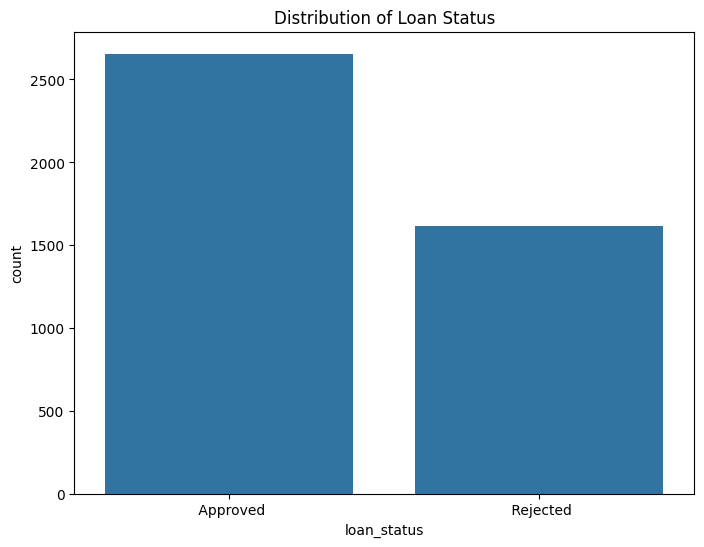

In [39]:
#overall distribution for approval and rejection
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts(normalize=True)) #normalize is to convert it into percentages

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

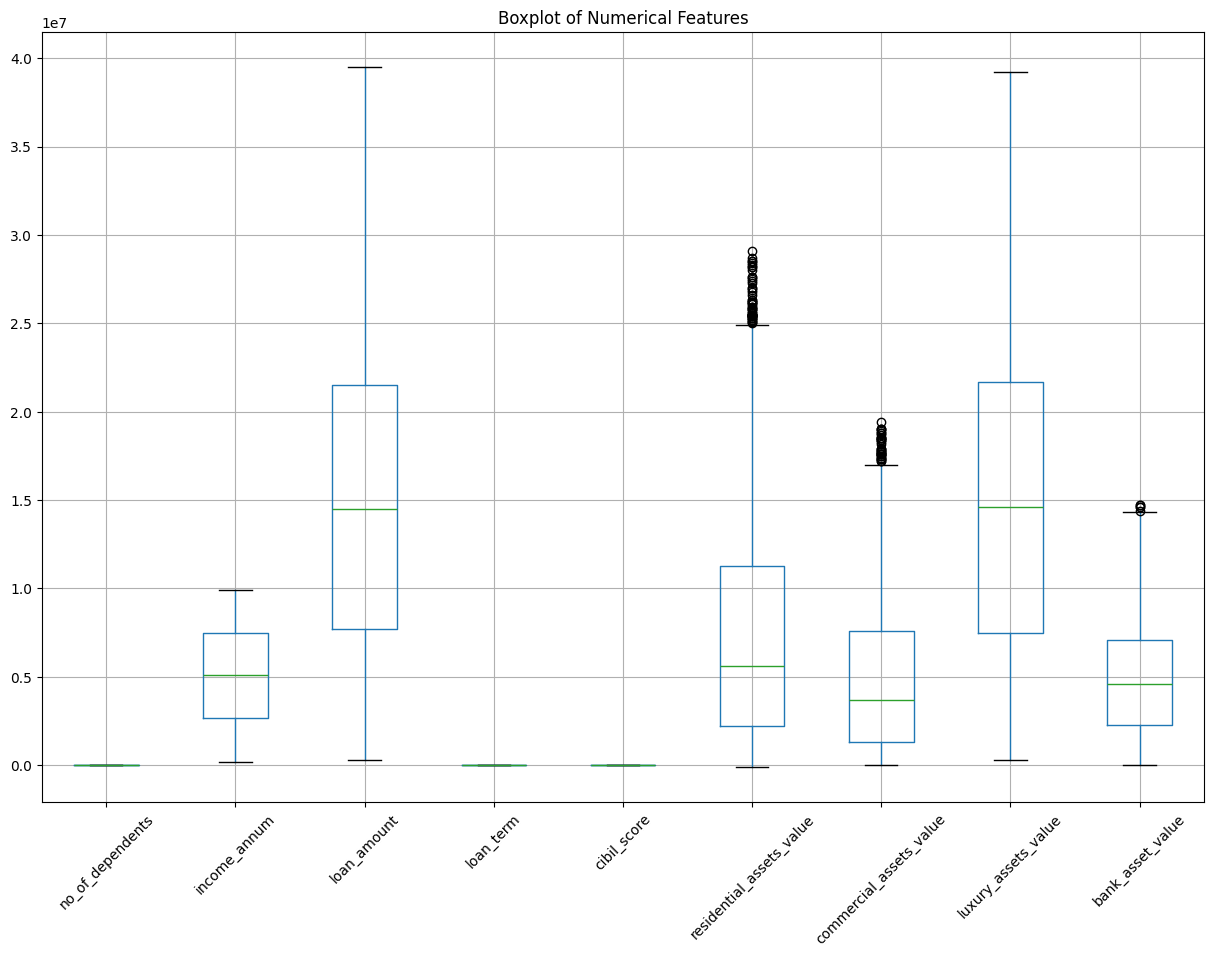

In [40]:
#check for outliers(dont know what to do with them)
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                 'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                 'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()


Distribution of education:
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


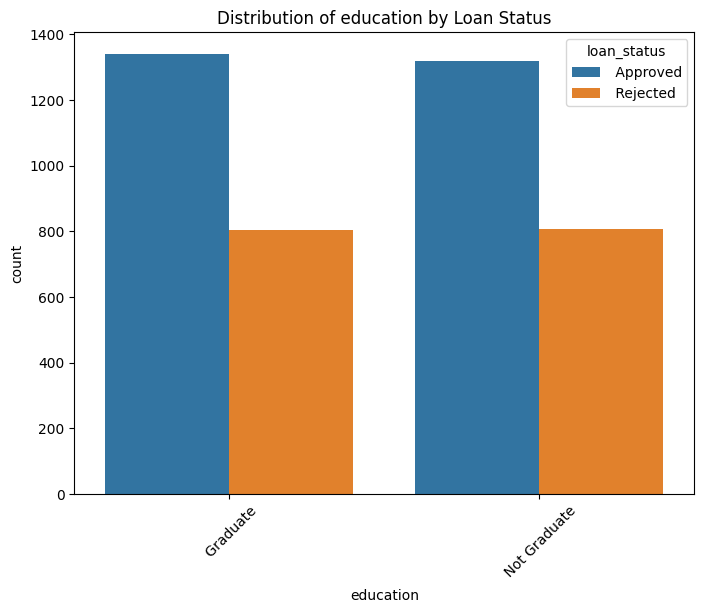


Distribution of self_employed:
self_employed
Yes    2150
No     2119
Name: count, dtype: int64


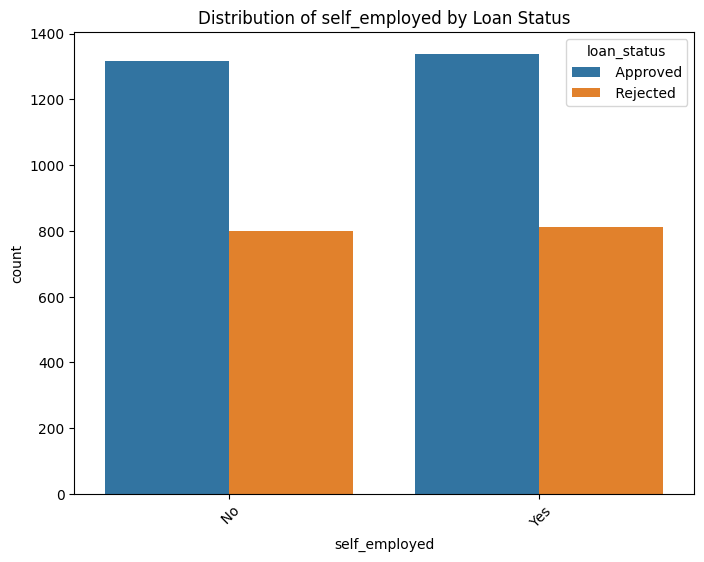

In [41]:
#self-employed and education are imp to see what trends pop related to approval
categorical_cols = ['education', 'self_employed']

for col in categorical_cols:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.xticks(rotation=45)
    plt.show()

In [44]:
# Check the data type and values before any conversion
print("Data type of original loan_status:")
print(df['loan_status'].dtype)

print("\nUnique values in original loan_status:")
print(df['loan_status'].unique())

print("\nValue counts in original loan_status:")
print(df['loan_status'].value_counts())

Data type of original loan_status:
object

Unique values in original loan_status:
[' Approved' ' Rejected']

Value counts in original loan_status:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [52]:

# 7. Feature Engineering
# Create new features that might be useful
df['debt_to_income'] = df['loan_amount'] / df['income_annum']
df['total_assets'] = (df['residential_assets_value'] + df['commercial_assets_value'] + 
                     df['luxury_assets_value'] + df['bank_asset_value'])
df['assets_to_loan'] = df['total_assets'] / df['loan_amount']

# Print unique values to see exact spelling/format
print("Unique values in loan_status:")
print(df['loan_status'].unique())

# Convert loan_status to string, strip spaces, and handle case sensitivity
df_encoded['str_loan_status'] = df_encoded['loan_status'].astype(str).str.strip().str.lower()

# Convert to binary: 'approved' -> 1, 'rejected' -> 0
df_encoded['bin_loan_status'] = (df_encoded['str_loan_status'] == 'approved').astype(int)

# Verify the conversion
print("\nBinary loan_status distribution:")
print(df_encoded['bin_loan_status'].value_counts())

print("\nFinal preprocessed dataset shape:", df_encoded.shape)
print("\nFinal columns:", df_encoded.columns.tolist())

Unique values in loan_status:
[' Approved' ' Rejected']

Binary loan_status distribution:
bin_loan_status
0    4269
Name: count, dtype: int64

Final preprocessed dataset shape: (4269, 19)

Final columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'debt_to_income', 'total_assets', 'assets_to_loan', 'education_ Graduate', 'education_ Not Graduate', 'self_employed_ No', 'self_employed_ Yes', 'bin_loan_status', 'str_loan_status']


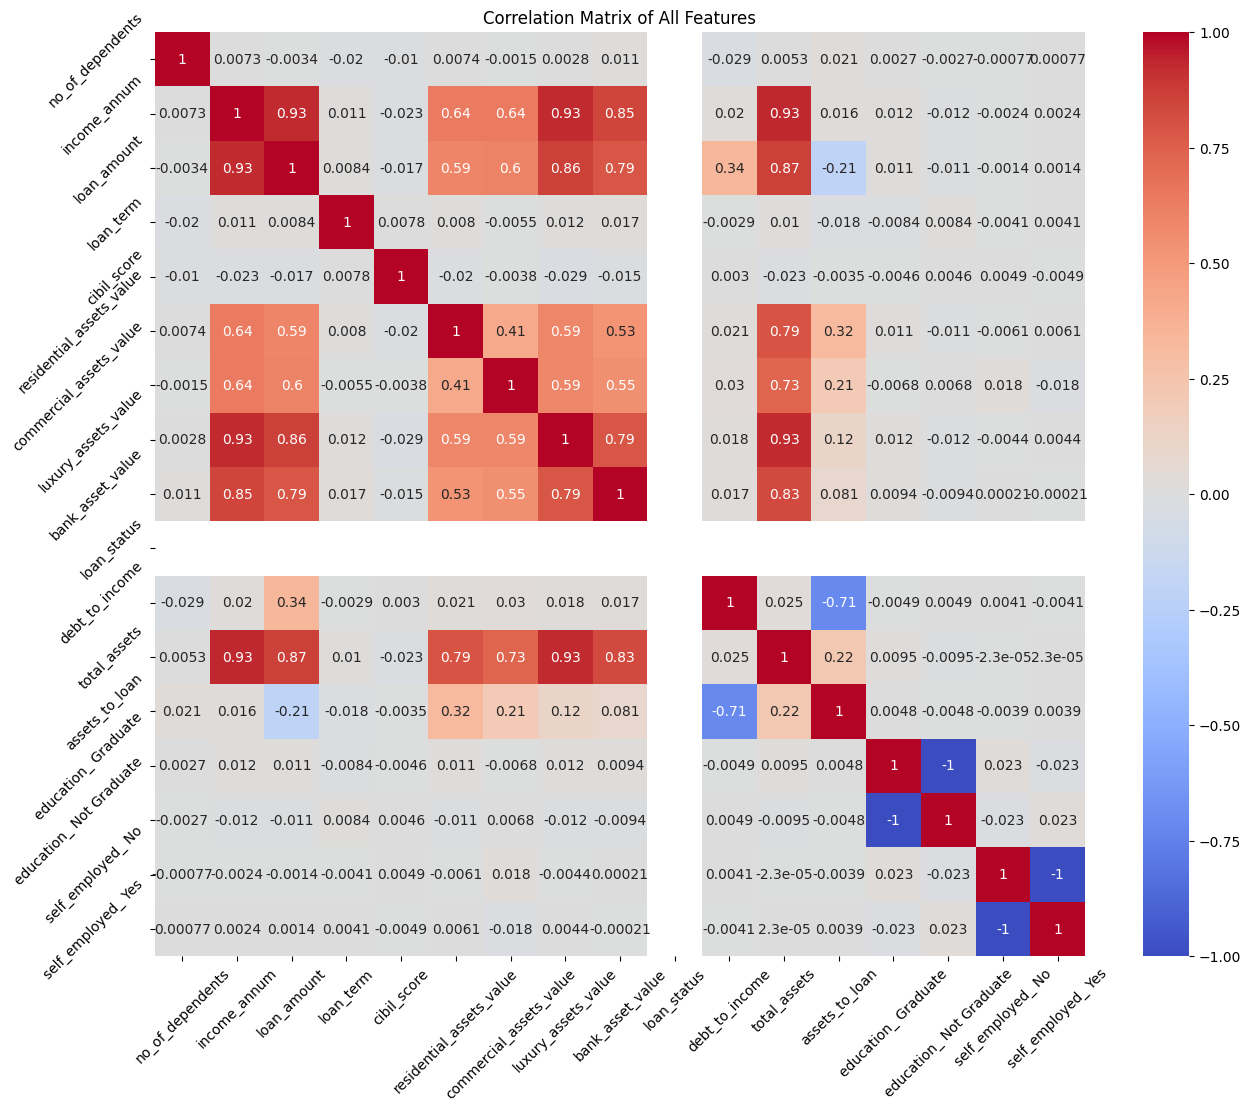

In [10]:
#correlation heatmap for all features
plt.figure(figsize=(15, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of All Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [18]:
# X(Features) and y(Targets)
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)




Feature matrix shape: (4269, 16)
Target vector shape: (4269,)


##Model Training 

In [14]:
# Scikit-learn for everything
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

#Scale for fairer testign and training conditions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
##Part 1 : Logistic-Regression

In [15]:

print("LOGISTIC REGRESSION MODEL")
print("-" * 50)

# 1. Initial Logistic Regression with K-fold CV
lr_model = LogisticRegression(random_state=42, max_iter=1000)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=kfold)

print("K-fold CV Scores:", lr_cv_scores)
print(f"Average CV Score: {lr_cv_scores.mean():.3f} (+/- {lr_cv_scores.std() * 2:.3f})")

# 2. Hyperparameter Tuning for Logistic Regression
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42), 
                      lr_params, 
                      cv=kfold,  # Using same k-fold strategy
                      scoring='accuracy',
                      n_jobs=-1)
lr_grid.fit(X_train_scaled, y_train)

# 3. Print Logistic Regression Results
print("\nBest Parameters:", lr_grid.best_params_)
print("Best Cross-validation Score:", lr_grid.best_score_)

# 4. Final Predictions with Best LR Model
lr_best_pred = lr_grid.best_estimator_.predict(X_test_scaled)
print("\nFinal Test Set Results:")
print(classification_report(y_test, lr_best_pred))

# 5. Plot LR Confusion Matrix
plot_confusion_matrix(y_test, lr_best_pred, 'Logistic Regression Confusion Matrix')



LOGISTIC REGRESSION MODEL
--------------------------------------------------


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\shres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)
